## **House Price in Lisbon**



In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# rename the path /content/gdrive/My\ Drive/ to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [3]:
# a folder where the data is
!ls /mydrive/Data_Science_Projects/House_Lisbon_Price/data

lisbon_houses.csv


Import libraries

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


Load a database

In [5]:

Path = '/mydrive/Data_Science_Projects/House_Lisbon_Price/data'

df = pd.read_csv(Path +'/lisbon_houses.csv')

df.head(10)

Id Condition PropertyType  ...                   Parish  Price M2    Price
0  101      Used        Homes  ...                  Olivais      2463   198000
1  102      Used        Homes  ...                Alcantara      3125  1270000
2  103      Used        Homes  ...                  Estrela      4005   140000
3  104      Used        Homes  ...  Sao Domingos de Benfica      3412   995000
4  105      Used        Homes  ...                  Arroios      3277   570000
5  106      Used        Homes  ...                    Belem      3542   425000
6  107      Used        Homes  ...                  Marvila      2881   130000
7  108      Used        Homes  ...  Sao Domingos de Benfica      3412   215000
8  109      Used        Homes  ...                  Olivais      2463   196000
9  110      Used        Homes  ...                   Lumiar      2927   925000

[10 rows x 17 columns]

Data info:

 - Id: is a unique identifying number assigned to each house.

 - Condition: The house condition (i.e., New, Used, As New, For Refurbishment).

 - PropertyType: Property type (i.e., Home, Single habitation)

 - PropertySubType: Property Sub Type (i.e., Apartment, duplex, etc.)

 - Bedrooms: Number of Bedrooms

 - Bathrooms: Number of Bathrooms

 - AreaNet:Net area of the house

 - AreaGross: Gross area of the house

 - Parking: Number of parking places

 - Latitude: Geographical Latitude

 - Longitude: Geographical Longitude

 - Country: Country where the house is located

 - District: District where the house is located

 - Municipality: Municipality where the house is located

 - Parish: Parish where the house is located

 - Price M2: Price per m² in the location of the house

 - Price: This is our training variable and target. It is the home price

In [6]:
print("Data Shape:")
display(df.shape)

Data Shape:


(246, 17)

Clean Data


In [7]:
df.describe(include='all')

Id Condition PropertyType  ...   Parish     Price M2         Price
count   246.000000       246          246  ...      246   246.000000  2.460000e+02
unique         NaN         4            2  ...       24          NaN           NaN
top            NaN       New        Homes  ...  Marvila          NaN           NaN
freq           NaN        96          239  ...       51          NaN           NaN
mean    226.670732       NaN          NaN  ...      NaN  3487.873984  5.516588e+05
std      72.308419       NaN          NaN  ...      NaN   715.896079  4.220916e+05
min     101.000000       NaN          NaN  ...      NaN  2393.000000  8.500000e+04
25%     166.250000       NaN          NaN  ...      NaN  2881.000000  2.712500e+05
50%     227.500000       NaN          NaN  ...      NaN  3402.000000  4.500000e+05
75%     288.750000       NaN          NaN  ...      NaN  3859.000000  7.150000e+05
max     350.000000       NaN          NaN  ...      NaN  5340.000000  4.150000e+06

[11 rows x 17 columns]

In [8]:
# three variables are nor relevants and can be dropped from the data
df = df.drop(['Country', 'District','Municipality'], axis=1)

In [9]:
# the column ID can be removed due to it's only a row's identificator
df = df.drop(['Id'], axis=1)

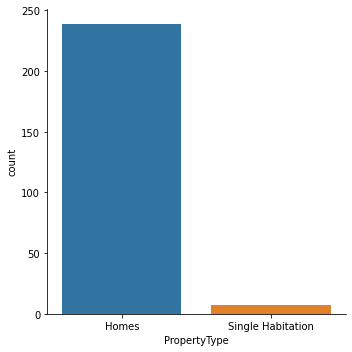

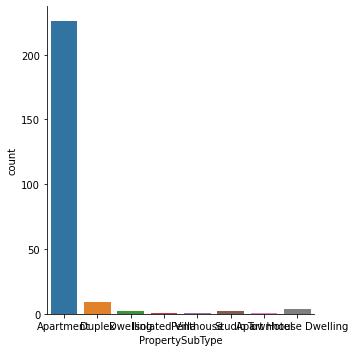

In [10]:
#  check the variables "PropertyType" and "PropertySubType"
sns.catplot(x="PropertyType", kind="count", data=df);
sns.catplot(x="PropertySubType", kind="count", data=df);

The dataset has an unbalanced distribution for the variables "PropertyType" and "PropertySubType". In case that the number of records is neither representative nor sufficient, it must be considered to remove these records. In case that the variable has a low impact on the target, it must be considered to remove the variable.




              Condition       PropertyType  ... Price M2    Price
49                Used  Single Habitation  ...     2463   850000
50                Used  Single Habitation  ...     3623  1750000
199             As New  Single Habitation  ...     2727   790000
200             As New  Single Habitation  ...     3542  1200000
243  For Refurbishment  Single Habitation  ...     2463   486000
244  For Refurbishment  Single Habitation  ...     3542   375000
245  For Refurbishment  Single Habitation  ...     3036   850000

[7 rows x 13 columns]


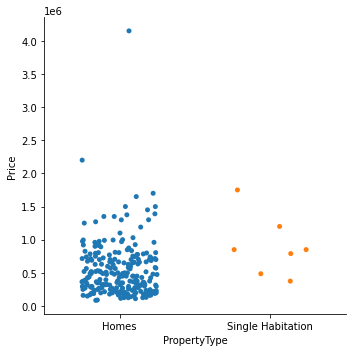

In [11]:
# check what values of price are related to the different groups of "PropertyType" and "PropertySubType".
sns.catplot(x='PropertyType', y='Price',  data=df,jitter='0.25')

lim_df = df[df['PropertyType'] == 'Single Habitation'] 
  
print('\n', lim_df) 

             Condition       PropertyType  ... Price M2    Price
1                 Used              Homes  ...     3125  1270000
49                Used  Single Habitation  ...     2463   850000
50                Used  Single Habitation  ...     3623  1750000
51                 New              Homes  ...     3841  1375000
55                 New              Homes  ...     2973   295000
126                New              Homes  ...     3402   220000
127                New              Homes  ...     3402   225000
144                New              Homes  ...     4807  4150000
146                New              Homes  ...     3412  1450000
156             As New              Homes  ...     3402   315000
176             As New              Homes  ...     3277   395000
187             As New              Homes  ...     3412   238000
192             As New              Homes  ...     4162   620000
196             As New              Homes  ...     3841  1190000
199             As New  S

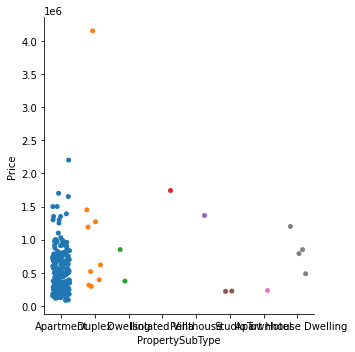

In [12]:
sns.catplot(x='PropertySubType', y='Price',  data=df,jitter='0.25')

lim_df = df[df['PropertySubType'] != 'Apartment'] 
  
print(lim_df) 

In both cases, there are not enough records for these variables to be used as features. These variables can influence the prediction. For this reason, it is decided to use only records with "PropertyType" equal to "Homes" and "PropertySubType" equal to "Apartment" and remove these two variables from the dataset.

In [13]:
df = df[df.PropertyType == 'Homes']
df = df.drop(['PropertyType'], axis=1)

df = df[df.PropertySubType == 'Apartment']
df = df.drop(['PropertySubType'], axis=1)

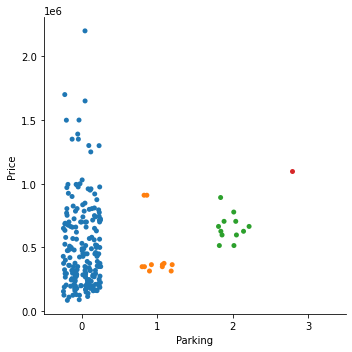

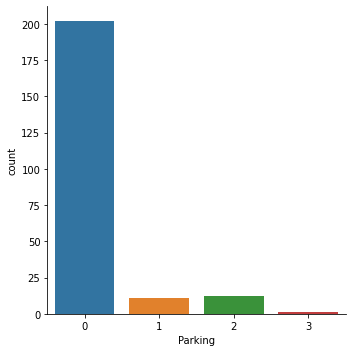

In [14]:
# Check the distribution of the column "Parking"
sns.catplot(x='Parking', y='Price',  data=df,jitter='0.25')
sns.catplot(x="Parking", kind="count", data=df);

In [15]:
# Remove 'Longitude' and 'Latitude' columns
df = df.drop(['Longitude', 'Latitude'], axis=1)

Check for missing values

In [16]:
df.isna().sum()

Condition    0
Bedrooms     0
Bathrooms    0
AreaNet      0
AreaGross    0
Parking      0
Parish       0
Price M2     0
Price        0
dtype: int64

In [17]:
# Create New Features
# Change this column for a binary column with information about "WithParking" (yes=1/no=0), and drop the column "Parking"
df['WithParking'] = np.where(df['Parking'] == '0', '0', '1')
df = df.drop(['Parking'], axis=1)

In [18]:
df.head()

Condition  Bedrooms  Bathrooms  ...  Price M2   Price WithParking
0      Used         3          1  ...      2463  198000           1
2      Used         1          1  ...      4005  140000           1
3      Used         5          4  ...      3412  995000           1
4      Used         7          1  ...      3277  570000           1
5      Used         3          2  ...      3542  425000           1

[5 rows x 9 columns]

In [19]:
# Transform categorical variables into dummy/indicator variables
df=pd.get_dummies(df);
df.head()

Bedrooms  Bathrooms  ...  Parish_Sao Vicente  WithParking_1
0         3          1  ...                   0              1
2         1          1  ...                   0              1
3         5          4  ...                   0              1
4         7          1  ...                   0              1
5         3          2  ...                   0              1

[5 rows x 35 columns]

In [20]:
# create my pandas dataframe
data = df[['Bedrooms', 'Bathrooms', 'AreaNet', 'AreaGross', 'Price M2', 'Price']]
data.head()

Bedrooms  Bathrooms  AreaNet  AreaGross  Price M2   Price
0         3          1       76        152      2463  198000
2         1          1       26         52      4005  140000
3         5          4      185        370      3412  995000
4         7          1      150        300      3277  570000
5         3          2       95        190      3542  425000

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 242
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Bedrooms   226 non-null    int64
 1   Bathrooms  226 non-null    int64
 2   AreaNet    226 non-null    int64
 3   AreaGross  226 non-null    int64
 4   Price M2   226 non-null    int64
 5   Price      226 non-null    int64
dtypes: int64(6)
memory usage: 22.4 KB


In [22]:
data.describe().round(2)

Bedrooms  Bathrooms  AreaNet  AreaGross  Price M2       Price
count    226.00     226.00   226.00     226.00    226.00      226.00
mean       2.41       1.77   105.54     211.07   3493.63   518336.53
std        1.15       0.97    56.89     113.78    728.66   336308.19
min        0.00       0.00    23.00      46.00   2393.00    85000.00
25%        2.00       1.00    63.25     126.50   2881.00   270000.00
50%        2.00       1.00    89.00     178.00   3277.00   445000.00
75%        3.00       2.00   141.00     282.00   3859.00   700000.00
max        8.00       6.00   359.00     718.00   5340.00  2200000.00

In [23]:
# A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column
#sns.pairplot(df)

Analysis of correlations between database columns

In [24]:
# correlation calculation
corr = data.corr()
print(data)

     Bedrooms  Bathrooms  AreaNet  AreaGross  Price M2   Price
0           3          1       76        152      2463  198000
2           1          1       26         52      4005  140000
3           5          4      185        370      3412  995000
4           7          1      150        300      3277  570000
5           3          2       95        190      3542  425000
..        ...        ...      ...        ...       ...     ...
238         1          1       54        108      5340  240000
239         3          2      113        226      2927  450000
240         2          1       46         92      3277  205000
241         2          1       66        132      2727  196500
242         3          1       75        150      4807  245000

[226 rows x 6 columns]


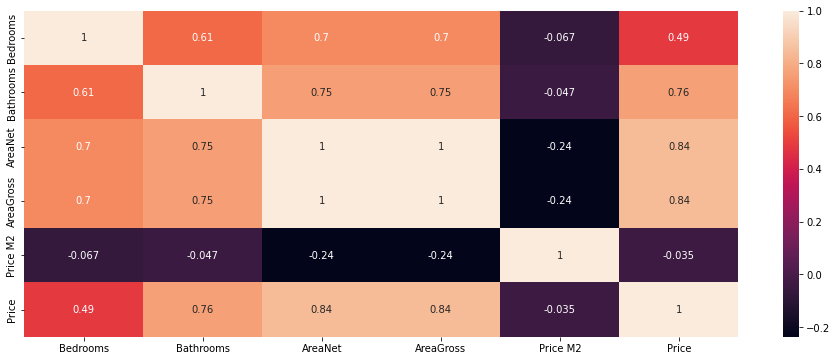

In [25]:
# seaborn's heatMap method
plt.figure(figsize=[16,6])
sns.heatmap(data = corr, annot=True)

Conclusions:


The column "Price M2" is the less linear relationship with "Price" and with all addictional features.


Area Net and Area Gross are depenedent variables, the Area Gross can be dropped

In [26]:
df = df.drop(['AreaGross'], axis=1)
df.head()

Bedrooms  Bathrooms  ...  Parish_Sao Vicente  WithParking_1
0         3          1  ...                   0              1
2         1          1  ...                   0              1
3         5          4  ...                   0              1
4         7          1  ...                   0              1
5         3          2  ...                   0              1

[5 rows x 34 columns]

## Data analysis and exploration

In [27]:
# install pandas profilling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [28]:
# import pandas profilling

from pandas_profiling import ProfileReport

In [29]:
# run profile
profile = ProfileReport(df, title = 'Report - Pandas Profilling', html={'style': {'full_width': True}})

In [30]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
# saving the report to disk
profile.to_file(output_file='/mydrive/Data_Science_Projects/House_Lisbon_Price/data/Report001.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Separates the dataset into training and testing sets

---


In [32]:
X = df.drop("Price", axis=1)
y = df['Price']

In [33]:
# Variable x 
X.head()

Bedrooms  Bathrooms  ...  Parish_Sao Vicente  WithParking_1
0         3          1  ...                   0              1
2         1          1  ...                   0              1
3         5          4  ...                   0              1
4         7          1  ...                   0              1
5         3          2  ...                   0              1

[5 rows x 33 columns]

In [34]:
# Data of our target variable
y.head()

0    198000
2    140000
3    995000
4    570000
5    425000
Name: Price, dtype: int64

In [35]:
# load train_test_split method
from sklearn.model_selection import train_test_split

In [36]:
# divide the data into training and test sets, respectively 90% and 10%
# set any value for random_state
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.1, random_state = 20)

In [37]:
# number of rows and columns
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", y_train.shape)
print("Y_test: ", y_test.shape)

X_train:  (203, 33)
X_test:  (23, 33)
Y_train:  (203,)
Y_test:  (23,)


## Machine Learning

### Linear Regression

In [38]:
# Load LinearRegression
from sklearn.linear_model import LinearRegression


In [39]:
# create the Linear Regression type algorithm
lin_model = LinearRegression()

In [40]:
# train the algorithm
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate the model

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Evaluate the model against the test set
y_pred = lin_model.predict(X_test)

In [42]:
# Metrics MAE
mae = mean_absolute_error(y_test, y_pred)

# Metrics MSE
mse = mean_squared_error(y_test, y_pred)

# Metrics RMSE
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [43]:
# Model performance
print("\n MAE: ", mae)
print("\n MSE: ", mse)
print("\n RMSE: ", rmse)


 MAE:  132560.84390054352

 MSE:  25769928187.44387

 RMSE:  160530.14728531172


#### Assigning results to a dataframe


In [44]:
# create an empty dataframe
data_results = pd.DataFrame()

In [45]:
# add actual value column
data_results['Real_Value'] = y_test

In [46]:
# add Linear_Regression_predicts column
y_pred = lin_model.predict(X_test)
data_results['Linear_Regression_predicts'] = y_pred

In [47]:
for i, price in enumerate(y_pred):
    print("Predicted price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted price for Client 1's home: $482,918.61
Predicted price for Client 2's home: $376,281.26
Predicted price for Client 3's home: $999,236.50
Predicted price for Client 4's home: $839,232.16
Predicted price for Client 5's home: $546,976.70
Predicted price for Client 6's home: $257,855.08
Predicted price for Client 7's home: $849,340.60
Predicted price for Client 8's home: $837,099.82
Predicted price for Client 9's home: $784,011.60
Predicted price for Client 10's home: $1,098,039.27
Predicted price for Client 11's home: $235,451.84
Predicted price for Client 12's home: $661,797.44
Predicted price for Client 13's home: $708,837.99
Predicted price for Client 14's home: $651,495.78
Predicted price for Client 15's home: $694,587.16
Predicted price for Client 16's home: $346,540.54
Predicted price for Client 17's home: $132,804.56
Predicted price for Client 18's home: $535,802.22
Predicted price for Client 19's home: $395,080.63
Predicted price for Client 20's home: $143,162.24
Predict

In [48]:
# printing the first 10 values
data_results.head(10)

Real_Value  Linear_Regression_predicts
0      745000                4.829186e+05
1      515000                3.762813e+05
2      970000                9.992365e+05
3      900000                8.392322e+05
4      349000                5.469767e+05
5      217000                2.578551e+05
6      699000                8.493406e+05
7      650000                8.370998e+05
8      490000                7.840116e+05
9      799000                1.098039e+06

In [49]:
# chart comparison
import plotly.graph_objects as go


In [50]:
# create trace
fig = go.Figure()

# lines with the data
fig.add_trace(go.Scatter(x=data_results.index,
                         y=data_results.Real_Value,
                         mode='lines+markers',
                         name='Real Value'))

# line with Linear Regression data
fig.add_trace(go.Scatter(x=data_results.index,
                         y=data_results.Linear_Regression_predicts,
                         mode='lines',
                         line= dict(color = '#A020F0'),
                         name='Linear Regression Predicts'))

# plot the graph
fig.show()

## Decision tree

In [51]:
# import DecisionTreeRegression
from sklearn.tree import DecisionTreeRegressor

In [52]:
# create an object of type DecisionTreeRegression
dtr = DecisionTreeRegressor()

In [53]:
# train the algorithm
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Evaluate the Decision Tree Model

In [54]:
# make predictions
y_pred = dtr.predict(X_test)

In [55]:
# add the value in data_results
data_results['Decision_Tree_predicts'] = y_pred

In [56]:
for i, price in enumerate(y_pred):
    print("Predicted price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted price for Client 1's home: $420,000.00
Predicted price for Client 2's home: $515,000.00
Predicted price for Client 3's home: $990,000.00
Predicted price for Client 4's home: $1,499,000.00
Predicted price for Client 5's home: $705,000.00
Predicted price for Client 6's home: $115,000.00
Predicted price for Client 7's home: $778,428.00
Predicted price for Client 8's home: $1,000,000.00
Predicted price for Client 9's home: $665,000.00
Predicted price for Client 10's home: $570,000.00
Predicted price for Client 11's home: $325,000.00
Predicted price for Client 12's home: $730,000.00
Predicted price for Client 13's home: $706,000.00
Predicted price for Client 14's home: $705,000.00
Predicted price for Client 15's home: $700,000.00
Predicted price for Client 16's home: $355,000.00
Predicted price for Client 17's home: $350,000.00
Predicted price for Client 18's home: $450,000.00
Predicted price for Client 19's home: $190,000.00
Predicted price for Client 20's home: $178,000.00
Predi

In [57]:
# visualize data_results
data_results.head(10)

Real_Value  Linear_Regression_predicts  Decision_Tree_predicts
0      745000                4.829186e+05                420000.0
1      515000                3.762813e+05                515000.0
2      970000                9.992365e+05                990000.0
3      900000                8.392322e+05               1499000.0
4      349000                5.469767e+05                705000.0
5      217000                2.578551e+05                115000.0
6      699000                8.493406e+05                778428.0
7      650000                8.370998e+05               1000000.0
8      490000                7.840116e+05                665000.0
9      799000                1.098039e+06                570000.0

In [58]:
# create trace
fig = go.Figure()

# lines with actual value data
fig.add_trace(go.Scatter(x=data_results.index,
                         y=data_results.Real_Value,
                         mode='lines+markers',
                         name='Real Value'))

# lines with the LinearRegression data
fig.add_trace(go.Scatter(x=data_results.index,
                         y=data_results.Linear_Regression_predicts,
                         mode='lines+markers',
                         name='Linear Regression Predicts'))

# lines with DecisionTreeRegression data
fig.add_trace(go.Scatter(x=data_results.index,
                         y=data_results.Decision_Tree_predicts,
                         mode='lines+markers',
                         name='Decision Tree Predicts'))

# show figure
fig.show()


In [59]:
# Metric RMSE
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [60]:
# print model performance
print("\nRMSE: ", rmse)


RMSE:  194957.3038189332


Random Forest

In [61]:
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [62]:
# create rfr object
rfr = RandomForestRegressor()

In [63]:
# train the model
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
# evaluate the model with test data
y_pred = rfr.predict(X_test)

In [65]:
# add to dataframe data_results
data_results['Random_Forest_predicts'] = y_pred


In [66]:
for i, price in enumerate(y_pred):
    print("Predicted price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted price for Client 1's home: $483,310.73
Predicted price for Client 2's home: $489,426.38
Predicted price for Client 3's home: $976,975.95
Predicted price for Client 4's home: $1,206,001.78
Predicted price for Client 5's home: $599,016.75
Predicted price for Client 6's home: $157,288.50
Predicted price for Client 7's home: $788,071.64
Predicted price for Client 8's home: $893,844.92
Predicted price for Client 9's home: $662,013.33
Predicted price for Client 10's home: $646,415.33
Predicted price for Client 11's home: $390,190.00
Predicted price for Client 12's home: $729,030.83
Predicted price for Client 13's home: $715,674.76
Predicted price for Client 14's home: $685,580.00
Predicted price for Client 15's home: $722,375.00
Predicted price for Client 16's home: $345,587.38
Predicted price for Client 17's home: $328,197.00
Predicted price for Client 18's home: $438,096.67
Predicted price for Client 19's home: $237,317.50
Predicted price for Client 20's home: $182,413.00
Predict

In [67]:
data_results.head(10)

Real_Value  ...  Random_Forest_predicts
0      745000  ...            4.833107e+05
1      515000  ...            4.894264e+05
2      970000  ...            9.769759e+05
3      900000  ...            1.206002e+06
4      349000  ...            5.990167e+05
5      217000  ...            1.572885e+05
6      699000  ...            7.880716e+05
7      650000  ...            8.938449e+05
8      490000  ...            6.620133e+05
9      799000  ...            6.464153e+05

[10 rows x 4 columns]

In [68]:
# metric rmse
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [69]:
# print a model performance
print("\nRMSE: ", rmse)


RMSE:  132224.51459219717


In [70]:
# create trace
fig = go.Figure()

# lines with actual value data
fig.add_trace(go.Scatter(x=data_results.index,
                         y=data_results.Real_Value,
                         mode='lines+markers',
                         name='Real Value'))

# lines with the Linear Regression data
fig.add_trace(go.Scatter(x=data_results.index,
                         y=data_results.Linear_Regression_predicts,
                         mode='lines+markers',
                         name='Linear Regression Predicts'))

# lines with DecisionTreeRegression data
fig.add_trace(go.Scatter(x=data_results.index,
                         y=data_results.Decision_Tree_predicts,
                         mode='lines+markers',
                         name='Decision Tree Predicts'))

# lines with Decision Tree Regression data
fig.add_trace(go.Scatter(x=data_results.index,
                         y=data_results.Random_Forest_predicts,
                         mode='lines+markers',
                         name='Random Forest Predicts'))

# show figure
fig.show()

Deploy

In [71]:
X['Price'] = y

In [72]:
X.head(10)

Bedrooms  Bathrooms  AreaNet  ...  Parish_Sao Vicente  WithParking_1   Price
0          3          1       76  ...                   0              1  198000
2          1          1       26  ...                   0              1  140000
3          5          4      185  ...                   0              1  995000
4          7          1      150  ...                   0              1  570000
5          3          2       95  ...                   0              1  425000
6          3          1       76  ...                   0              1  130000
7          3          1       81  ...                   0              1  215000
8          2          1       58  ...                   0              1  196000
9          5          3      286  ...                   0              1  925000
10         2          1       68  ...                   0              1  170000

[10 rows x 34 columns]

In [73]:
X.to_csv('/mydrive/Data_Science_Projects/House_Lisbon_Price/data/data.csv', index=False)

#Conclusions

Studies based on currently available data, remembering that in the real world we have to work in other ways to find more variables that explain the behavior of our output verifiable. (proximity to schools, hospitals, supermarkets, etc.) that we know are important when evaluating the value of a home.


Our valuation metrics, as they are loss functions, must be premised on "the lower the value, the better". Once again, working to find more and better input variables, these values will certainly improve as well.